**1) Análise Inicial: Estrutura dos Dados**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import chi2_contingency
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm

# Removendo a importação do google.colab
# from google.colab import drive

# Removendo a linha de montagem do Google Drive
# drive.mount('/content/drive')

# Defina o caminho correto para o arquivo no seu computador local
file_path = "c:/Users/gina_/OneDrive/Área de Trabalho/PUC/AULAS 7 SEMESTRE/Projeto/colorectal_cancer_prediction.xlsx"

# Carregar o dataset diretamente usando pandas
df = pd.read_excel(file_path, dtype=str)

# Agora você pode continuar com o restante do seu código...
print(df.head()) # Exemplo para verificar se o DataFrame foi carregado corretamente


  Patient_ID Age  Gender   Race         Region Urban_or_Rural  \
0          1  71    Male  Other         Europe          Urban   
1          2  34  Female  Black  North America          Urban   
2          3  80  Female  White  North America          Urban   
3          4  40    Male  Black  North America          Rural   
4          5  43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

  Stage_at_Diagnosis  ... Insurance_Coverage Time_to_Diagnosis  \
0                III  ...                Yes           Delayed   
1                  I  ...                 No            Timely   
2                III

In [12]:
# Dimensões do DataFrame (quantidade de linhas e colunas).
print(df.shape)

(89945, 30)


In [13]:
# Lista todas as colunas do dataframe
# Imprime o índice das colunas
print(df.columns)
# Remove espaços em branco (tanto à esquerda quanto à direita) dos nomes das colunas
df.columns = df.columns.str.strip()
# Converte o índice das colunas do DataFrame df em uma lista Python e a imprime
print(df.columns.tolist())
# Imprime o índice das linhas
print(df.index)
# Reseta o índice do DataFrame df para o padrão (uma sequência de números inteiros começando em 0) e remove o índice antigo
df = df.reset_index(drop=True)
# Mostra o tipo de informação que cada coluna contém (números, texto, etc.).
print(df.dtypes)

Index(['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural',
       'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History',
       'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access',
       'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level',
       'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption',
       'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis',
       'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received',
       'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status',
       'Recurrence', 'Time_to_Recurrence'],
      dtype='object')
['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption', '

In [14]:
# Exibir as primeiras 5 linhas com todas as colunas
print("First 5 records with all 30 columns:")
print(df.head())

First 5 records with all 30 columns:
  Patient_ID Age  Gender   Race         Region Urban_or_Rural  \
0          1  71    Male  Other         Europe          Urban   
1          2  34  Female  Black  North America          Urban   
2          3  80  Female  White  North America          Urban   
3          4  40    Male  Black  North America          Rural   
4          5  43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

  Stage_at_Diagnosis  ... Insurance_Coverage Time_to_Diagnosis  \
0                III  ...                Yes           Delayed   
1                  I  ...                 No     

In [15]:
# Verificar as informações do dataset (tipos de dados, valores nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               89945 non-null  object
 1   Age                      89945 non-null  object
 2   Gender                   89945 non-null  object
 3   Race                     89945 non-null  object
 4   Region                   89945 non-null  object
 5   Urban_or_Rural           89945 non-null  object
 6   Socioeconomic_Status     89945 non-null  object
 7   Family_History           89945 non-null  object
 8   Previous_Cancer_History  89945 non-null  object
 9   Stage_at_Diagnosis       89945 non-null  object
 10  Tumor_Aggressiveness     89945 non-null  object
 11  Colonoscopy_Access       89945 non-null  object
 12  Screening_Regularity     89945 non-null  object
 13  Diet_Type                89945 non-null  object
 14  BMI                      89945 non-nul

In [16]:
# Verificar quantas linhas estão completamente vazias. (Não há nenhuma linha vazia)
print(df[df.isnull().all(axis=1)])

# Exibir todas as linhas onde todos os valores são NaN. (Todas as linhas do DataFrame possuem pelo menos um valor preenchido)
print((df.isnull().any(axis=1)).sum())

# Print de verificação de valores ausentes. (Não há valor ausente)
print(df.isnull().sum())

Empty DataFrame
Columns: [Patient_ID, Age, Gender, Race, Region, Urban_or_Rural, Socioeconomic_Status, Family_History, Previous_Cancer_History, Stage_at_Diagnosis, Tumor_Aggressiveness, Colonoscopy_Access, Screening_Regularity, Diet_Type, BMI, Physical_Activity_Level, Smoking_Status, Alcohol_Consumption, Red_Meat_Consumption, Fiber_Consumption, Insurance_Coverage, Time_to_Diagnosis, Treatment_Access, Chemotherapy_Received, Radiotherapy_Received, Surgery_Received, Follow_Up_Adherence, Survival_Status, Recurrence, Time_to_Recurrence]
Index: []

[0 rows x 30 columns]
0
Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                  

**2) Transformando os dados categóricos em numéricos na categoria "Diagnóstico, Características do Câncer e Tratamento" e nas colunas Age e Time_to_Recurrence:**

In [17]:
# Coluna Stage_at_Diagnosi:
# Descrição: Estágio do câncer no momento do diagnóstico.
stage_mapping = {"I": 0, "II": 1, "III": 2, "IV": 3}
df["Stage_at_Diagnosis"] = df["Stage_at_Diagnosis"].map(stage_mapping)
df.replace({"Stage_at_Diagnosis": stage_mapping}, inplace=True)
print(df["Stage_at_Diagnosis"].head)

<bound method NDFrame.head of 0        2
1        0
2        2
3        0
4        2
        ..
89940    3
89941    1
89942    0
89943    1
89944    3
Name: Stage_at_Diagnosis, Length: 89945, dtype: int64>


In [18]:
# Coluna Tumor_Aggressiveness:
# Descrição: Nível de agressividade do tumor.
tumor_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["Tumor_Aggressiveness"] = df["Tumor_Aggressiveness"].map(tumor_mapping)
df.replace({"Tumor_Aggressiveness": stage_mapping}, inplace=True)
print(df["Tumor_Aggressiveness"].head)


<bound method NDFrame.head of 0        2
1        1
2        0
3        1
4        0
        ..
89940    1
89941    0
89942    1
89943    0
89944    1
Name: Tumor_Aggressiveness, Length: 89945, dtype: int64>


In [19]:
# Coluna Insurance_Coverage
# Descrição: Paciente possui plano de saúde.
insurance_mapping = {"Yes": 1, "No": 0}
df["Insurance_Coverage"] = df["Insurance_Coverage"].map(insurance_mapping)
df.replace({"Insurance_Coverage": insurance_mapping}, inplace=True)
print(df["Insurance_Coverage"].head)


<bound method NDFrame.head of 0        1
1        0
2        1
3        1
4        0
        ..
89940    1
89941    1
89942    1
89943    1
89944    1
Name: Insurance_Coverage, Length: 89945, dtype: int64>


In [20]:
# Coluna Time_to_Diagnosis
# Descrição: Tempo decorrido entre os primeiros sintomas e o diagnóstico.
time_to_diagnosis_mapping = {"Delayed": 0, "Timely": 1}
df["Time_to_Diagnosis"] = df["Time_to_Diagnosis"].map(time_to_diagnosis_mapping)
df.replace({"Time_to_Diagnosis": time_to_diagnosis_mapping}, inplace=True)
print(df["Time_to_Diagnosis"].head)

<bound method NDFrame.head of 0        0
1        1
2        1
3        0
4        0
        ..
89940    1
89941    0
89942    0
89943    1
89944    1
Name: Time_to_Diagnosis, Length: 89945, dtype: int64>


In [21]:
# Coluna Treatment_Access
# Descrição: Nível de acesso ao tratamento.
treatment_access_mapping = {"Good": 1, "Limited": 0}
df["Treatment_Access"] = df["Treatment_Access"].map(treatment_access_mapping)
df.replace({"Treatment_Access": treatment_access_mapping}, inplace=True)
print(df["Treatment_Access"].head)


<bound method NDFrame.head of 0        1
1        1
2        0
3        0
4        1
        ..
89940    1
89941    1
89942    1
89943    0
89944    1
Name: Treatment_Access, Length: 89945, dtype: int64>


In [22]:
# Coluna Chemotherapy_Received
# Descrição: O paciente realizou quimioterapia?
chemotherapy_mapping = {"Yes": 1, "No": 0}
df["Chemotherapy_Received"] = df["Chemotherapy_Received"].map(chemotherapy_mapping)
df.replace({"Chemotherapy_Received": chemotherapy_mapping}, inplace=True)
print(df["Chemotherapy_Received"].head)

<bound method NDFrame.head of 0        1
1        0
2        0
3        1
4        1
        ..
89940    0
89941    0
89942    0
89943    0
89944    0
Name: Chemotherapy_Received, Length: 89945, dtype: int64>


In [23]:
# Coluna Radiotherapy_Received
# Descrição: O paciente realizou radioterapia?
radiotherapy_mapping = {"Yes": 1, "No": 0}
df["Radiotherapy_Received"] = df["Radiotherapy_Received"].map(radiotherapy_mapping)
df.replace({"Radiotherapy_Received": radiotherapy_mapping}, inplace=True)
print(df["Radiotherapy_Received"].head)




<bound method NDFrame.head of 0        0
1        1
2        1
3        0
4        0
        ..
89940    0
89941    0
89942    1
89943    0
89944    0
Name: Radiotherapy_Received, Length: 89945, dtype: int64>


In [24]:
# Coluna Age (Idade)
# Descrição: Idade do paciente em anos.
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
# Ver se tem algum NaN
print(df["Age"].isnull().sum())
print(df[df["Age"].isnull()])
print(df["Age"].head)

0
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Race, Region, Urban_or_Rural, Socioeconomic_Status, Family_History, Previous_Cancer_History, Stage_at_Diagnosis, Tumor_Aggressiveness, Colonoscopy_Access, Screening_Regularity, Diet_Type, BMI, Physical_Activity_Level, Smoking_Status, Alcohol_Consumption, Red_Meat_Consumption, Fiber_Consumption, Insurance_Coverage, Time_to_Diagnosis, Treatment_Access, Chemotherapy_Received, Radiotherapy_Received, Surgery_Received, Follow_Up_Adherence, Survival_Status, Recurrence, Time_to_Recurrence]
Index: []

[0 rows x 30 columns]
<bound method NDFrame.head of 0        71
1        34
2        80
3        40
4        43
         ..
89940    72
89941    59
89942    77
89943    37
89944    69
Name: Age, Length: 89945, dtype: int64>


In [25]:
# Coluna Time_to_Recurrence (Tempo até a Recorrência)
# Descrição: Tempo decorrido até a recorrência do câncer (em meses).
df["Time_to_Recurrence"] = pd.to_numeric(df["Time_to_Recurrence"], errors="coerce")
# Ver se tem algum NaN
print(df["BMI"].isnull().sum())
print(df["Time_to_Recurrence"].head)

0
<bound method NDFrame.head of 0        16
1        28
2        26
3        44
4        20
         ..
89940    25
89941    46
89942    41
89943    47
89944    35
Name: Time_to_Recurrence, Length: 89945, dtype: int64>


In [26]:
# Coluna Colonoscopy_Access (Acesso à Colonoscopia)
# Descrição: Paciente teve acesso à colonoscopia para rastreamento?
colonoscopy_mapping = {"Yes": 1, "No": 0}
df["Colonoscopy_Access"] = df["Colonoscopy_Access"].map(colonoscopy_mapping)
df.replace({"Colonoscopy_Access": colonoscopy_mapping}, inplace=True)
print(df["Colonoscopy_Access"].head())

0    0
1    1
2    1
3    1
4    1
Name: Colonoscopy_Access, dtype: int64


In [27]:
# Verificando se as colunas acima foram transformadas em numéricos.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               89945 non-null  object
 1   Age                      89945 non-null  int64 
 2   Gender                   89945 non-null  object
 3   Race                     89945 non-null  object
 4   Region                   89945 non-null  object
 5   Urban_or_Rural           89945 non-null  object
 6   Socioeconomic_Status     89945 non-null  object
 7   Family_History           89945 non-null  object
 8   Previous_Cancer_History  89945 non-null  object
 9   Stage_at_Diagnosis       89945 non-null  int64 
 10  Tumor_Aggressiveness     89945 non-null  int64 
 11  Colonoscopy_Access       89945 non-null  int64 
 12  Screening_Regularity     89945 non-null  object
 13  Diet_Type                89945 non-null  object
 14  BMI                      89945 non-nul

In [28]:
# Printando as colunas para ver se está tudo certo no dataset.
print(df.head())

  Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0          1   71    Male  Other         Europe          Urban   
1          2   34  Female  Black  North America          Urban   
2          3   80  Female  White  North America          Urban   
3          4   40    Male  Black  North America          Rural   
4          5   43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

   Stage_at_Diagnosis  ...  Insurance_Coverage  Time_to_Diagnosis  \
0                   2  ...                   1                  0   
1                   0  ...                   0                  1   
2    

**3) Realizando análises estatísticas na categoria "Diagnóstico, Características do Câncer e Tratamento":**

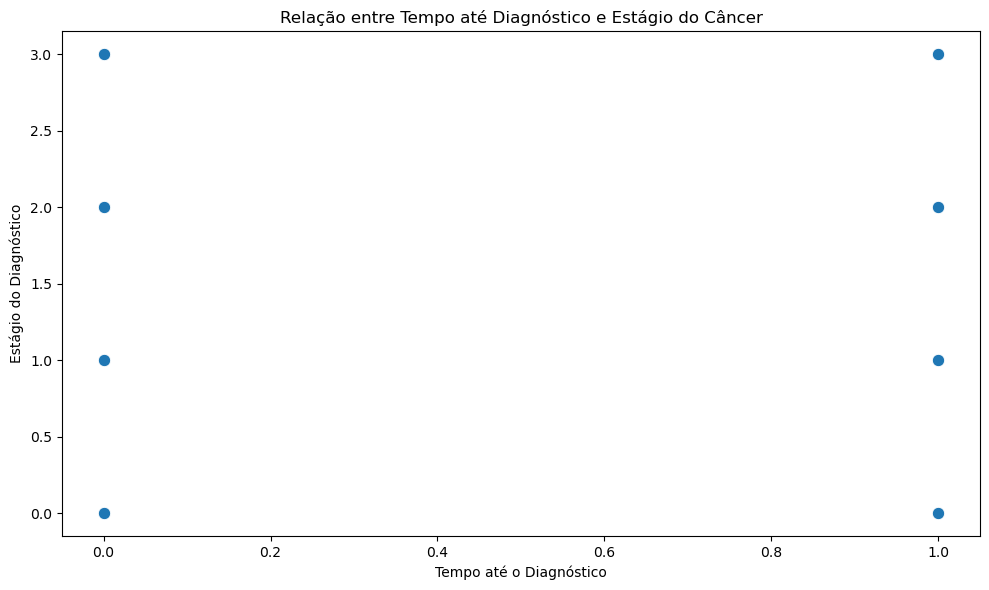




Explicação dos Resultados:

O gráfico de dispersão gerado analisa a relação entre o tempo até o diagnóstico
e o estágio do câncer. Observa-se que os dados estão distribuídos em pontos
discretos, indicando que tanto o tempo até o diagnóstico quanto o estágio do
câncer são variáveis categóricas ou discretas. Não há uma correlação linear
clara entre as duas variáveis, sugerindo que o tempo até o diagnóstico não
determina diretamente o estágio do câncer, e vice-versa. A distribuição dos
pontos sugere que existem pacientes diagnosticados em diferentes estágios da
doença, independentemente do tempo que levou para o diagnóstico. A análise
sugere que outros fatores, além do tempo até o diagnóstico, podem influenciar o
estágio do câncer. É importante notar que a ausência de uma correlação linear
não exclui a possibilidade de relações não lineares ou interações complexas
entre as variáveis.


In [29]:
# Gráfico de dispersão: Análise de relação entre as variáveis Time_to_Diagnosis e Stage_at_Diagnosis
plt.figure(figsize=(10, 6))  # Aumentei o tamanho da figura para melhor visualização
sns.scatterplot(x="Time_to_Diagnosis", y="Stage_at_Diagnosis", data=df, s=80) # Aumentei o tamanho dos pontos para melhor visualização
plt.title("Relação entre Tempo até Diagnóstico e Estágio do Câncer")
plt.xlabel("Tempo até o Diagnóstico")  # Adicionei rótulos aos eixos para melhor clareza
plt.ylabel("Estágio do Diagnóstico")
plt.tight_layout() # Garante que os rótulos não sejam cortados
plt.show()

# Texto explicativo
texto5 = (
    "O gráfico de dispersão gerado analisa a relação entre o tempo até o diagnóstico e o estágio do câncer. "
    "Observa-se que os dados estão distribuídos em pontos discretos, indicando que tanto o tempo até o diagnóstico quanto o estágio do câncer são variáveis categóricas ou discretas. "
    "Não há uma correlação linear clara entre as duas variáveis, sugerindo que o tempo até o diagnóstico não determina diretamente o estágio do câncer, e vice-versa. "
    "A distribuição dos pontos sugere que existem pacientes diagnosticados em diferentes estágios da doença, independentemente do tempo que levou para o diagnóstico. "
    "A análise sugere que outros fatores, além do tempo até o diagnóstico, podem influenciar o estágio do câncer. "
    "É importante notar que a ausência de uma correlação linear não exclui a possibilidade de relações não lineares ou interações complexas entre as variáveis."
)

# Inserindo um espaço
print("\n")

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto5, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)


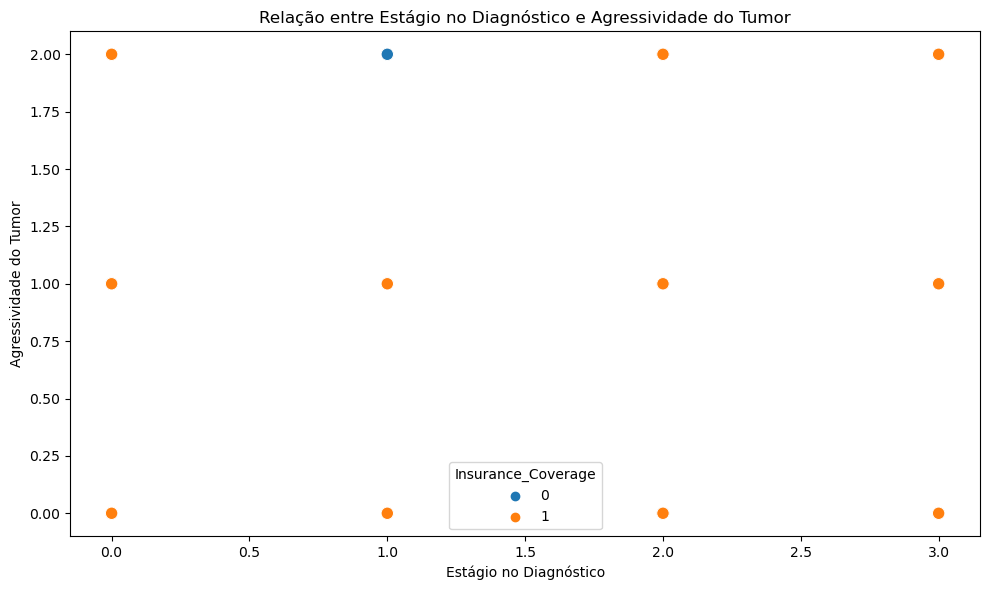




Explicação dos Resultados:

O gráfico de dispersão gerado analisa a relação entre o estágio do diagnóstico e
a agressividade do tumor, com a cobertura de seguro codificada por cores.
Observa-se que os dados estão distribuídos em pontos discretos, indicando que
tanto o estágio do diagnóstico quanto a agressividade do tumor são variáveis
categóricas ou discretas. Não há uma correlação linear clara entre as duas
variáveis, sugerindo que o estágio do diagnóstico não determina diretamente a
agressividade do tumor, e vice-versa. A cobertura de seguro (codificada por
cores) parece estar distribuída uniformemente entre os diferentes estágios de
diagnóstico e níveis de agressividade do tumor, o que indica que a cobertura de
seguro não está fortemente associada a essas duas variáveis. A análise sugere
que outros fatores, além do estágio do diagnóstico e da cobertura de seguro,
podem influenciar a agressividade do tumor. É importante notar que a ausência de
uma correlação linear não exclui a p

In [30]:
# Gráficos de dispersão: Análise de relação entre variáveis Stage_at_Diagnosis, Tumor_Aggressiveness e Insurance_Coverage
if 'Stage_at_Diagnosis' in df.columns and 'Tumor_Aggressiveness' in df.columns:
    plt.figure(figsize=(10, 6))  # Aumentei o tamanho da figura para melhor visualização
    sns.scatterplot(data=df, x="Stage_at_Diagnosis", y="Tumor_Aggressiveness", hue="Insurance_Coverage", s=80) # Aumentei o tamanho dos pontos para melhor visualização
    plt.title("Relação entre Estágio no Diagnóstico e Agressividade do Tumor")
    plt.xlabel("Estágio no Diagnóstico")  # Adicionei rótulos aos eixos para melhor clareza
    plt.ylabel("Agressividade do Tumor")
    plt.tight_layout() # Garante que os rótulos não sejam cortados
    plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto4 = (
    "O gráfico de dispersão gerado analisa a relação entre o estágio do diagnóstico e a agressividade do tumor, com a cobertura de seguro codificada por cores. "
    "Observa-se que os dados estão distribuídos em pontos discretos, indicando que tanto o estágio do diagnóstico quanto a agressividade do tumor são variáveis categóricas ou discretas. "
    "Não há uma correlação linear clara entre as duas variáveis, sugerindo que o estágio do diagnóstico não determina diretamente a agressividade do tumor, e vice-versa. "
    "A cobertura de seguro (codificada por cores) parece estar distribuída uniformemente entre os diferentes estágios de diagnóstico e níveis de agressividade do tumor, "
    "o que indica que a cobertura de seguro não está fortemente associada a essas duas variáveis. "
    "A análise sugere que outros fatores, além do estágio do diagnóstico e da cobertura de seguro, podem influenciar a agressividade do tumor. "
    "É importante notar que a ausência de uma correlação linear não exclui a possibilidade de relações não lineares ou interações complexas entre as variáveis."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto4, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

**4) Analisando cada coluna separadamente na categoria "Diagnóstico, Características do Câncer e Tratamento":**

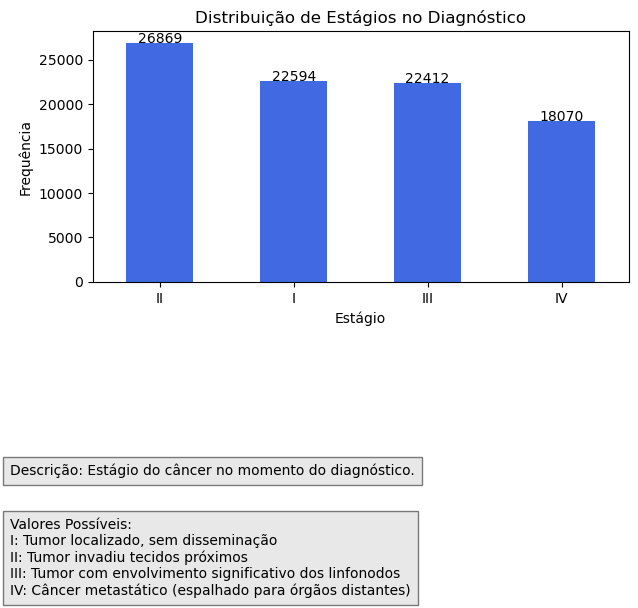




Explicação dos Resultados:

O gráfico de barras exibe a distribuição dos estágios do diagnóstico de câncer,
mostrando a frequência de pacientes em cada estágio. Observa-se que o estágio II
é o mais frequente, seguido pelos estágios I e III, que apresentam frequências
semelhantes. O estágio IV, que representa o câncer metastático, é o menos
frequente. Essa distribuição pode refletir a prevalência de diferentes estágios
de câncer na população estudada ou as características do diagnóstico e
encaminhamento dos pacientes. A análise da distribuição dos estágios do
diagnóstico pode auxiliar na compreensão da progressão da doença e no
planejamento de estratégias de tratamento e acompanhamento.


In [31]:
# Gráfico de barras para a distribuição dos estágios do diagnóstico

# Contagem dos valores
counts = df["Stage_at_Diagnosis"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Distribuição de Estágios no Diagnóstico", color='royalblue')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Estágio")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1, 2, 3], labels=["II", "I", "III", "IV"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: Estágio do câncer no momento do diagnóstico.", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa, com espaço entre as caixas)
valores_possiveis = (
    "Valores Possíveis:\n"
    "I: Tumor localizado, sem disseminação\n"
    "II: Tumor invadiu tecidos próximos\n"
    "III: Tumor com envolvimento significativo dos linfonodos\n"
    "IV: Câncer metastático (espalhado para órgãos distantes)"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição


plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto6 = (
    "O gráfico de barras exibe a distribuição dos estágios do diagnóstico de câncer, mostrando a frequência de pacientes em cada estágio. "
    "Observa-se que o estágio II é o mais frequente, seguido pelos estágios I e III, que apresentam frequências semelhantes. "
    "O estágio IV, que representa o câncer metastático, é o menos frequente. "
    "Essa distribuição pode refletir a prevalência de diferentes estágios de câncer na população estudada ou as características do diagnóstico e encaminhamento dos pacientes. "
    "A análise da distribuição dos estágios do diagnóstico pode auxiliar na compreensão da progressão da doença e no planejamento de estratégias de tratamento e acompanhamento."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto6, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

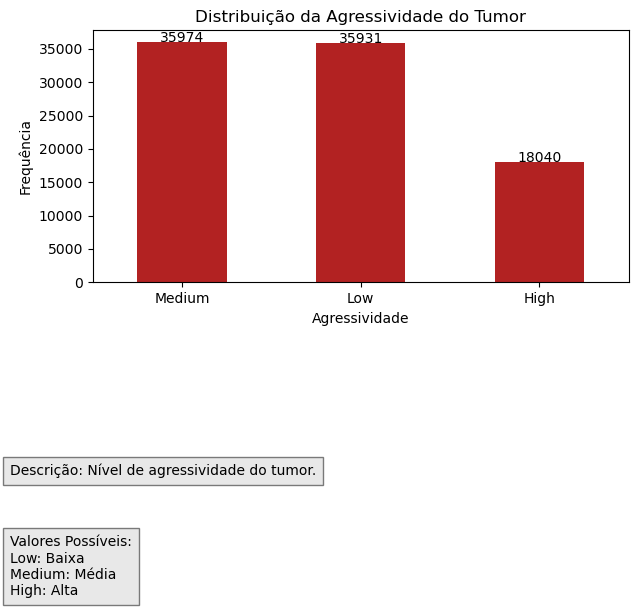




Explicação dos Resultados:

O gráfico de barras exibe a distribuição da agressividade do tumor, mostrando a
frequência de pacientes em cada nível de agressividade. Observa-se que a
agressividade média e baixa são as mais frequentes, com frequências semelhantes,
enquanto a agressividade alta é a menos frequente. Essa distribuição pode
refletir as características dos tumores na população estudada ou os critérios de
classificação da agressividade tumoral. A análise da distribuição da
agressividade tumoral pode auxiliar na compreensão do comportamento dos tumores
e no planejamento de estratégias de tratamento e acompanhamento.


In [32]:
# Gráfico de barras para a agressividade do tumor

# Contagem dos valores
counts = df["Tumor_Aggressiveness"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Distribuição da Agressividade do Tumor", color='firebrick')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Agressividade")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1, 2], labels=["Medium", "Low", "High"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: Nível de agressividade do tumor.", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Low: Baixa\n"
    "Medium: Média\n"
    "High: Alta"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição


plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto7 = (
    "O gráfico de barras exibe a distribuição da agressividade do tumor, mostrando a frequência de pacientes em cada nível de agressividade. "
    "Observa-se que a agressividade média e baixa são as mais frequentes, com frequências semelhantes, enquanto a agressividade alta é a menos frequente. "
    "Essa distribuição pode refletir as características dos tumores na população estudada ou os critérios de classificação da agressividade tumoral. "
    "A análise da distribuição da agressividade tumoral pode auxiliar na compreensão do comportamento dos tumores e no planejamento de estratégias de tratamento e acompanhamento."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto7, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

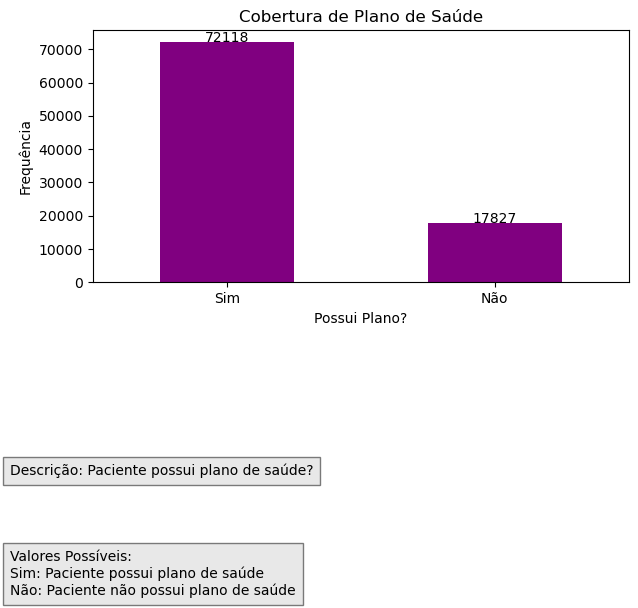




Explicação dos Resultados:

O gráfico de barras exibe a distribuição da cobertura de plano de saúde entre os
pacientes. Observa-se que a maioria dos pacientes possui plano de saúde, com uma
frequência significativamente maior em comparação com aqueles que não possuem.
Essa distribuição pode refletir a prevalência de planos de saúde na população
estudada ou os critérios de inclusão dos pacientes na análise. A análise da
cobertura de plano de saúde pode auxiliar na compreensão do acesso aos serviços
de saúde e no planejamento de estratégias de tratamento e acompanhamento.


In [33]:
# Gráfico de barras para plano de saúde

# Contagem dos valores
counts = df["Insurance_Coverage"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Cobertura de Plano de Saúde", color='purple')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Possui Plano?")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1], labels=["Sim", "Não"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: Paciente possui plano de saúde?", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Sim: Paciente possui plano de saúde\n"
    "Não: Paciente não possui plano de saúde"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição


plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto8 = (
    "O gráfico de barras exibe a distribuição da cobertura de plano de saúde entre os pacientes. "
    "Observa-se que a maioria dos pacientes possui plano de saúde, com uma frequência significativamente maior em comparação com aqueles que não possuem. "
    "Essa distribuição pode refletir a prevalência de planos de saúde na população estudada ou os critérios de inclusão dos pacientes na análise. "
    "A análise da cobertura de plano de saúde pode auxiliar na compreensão do acesso aos serviços de saúde e no planejamento de estratégias de tratamento e acompanhamento."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto8, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

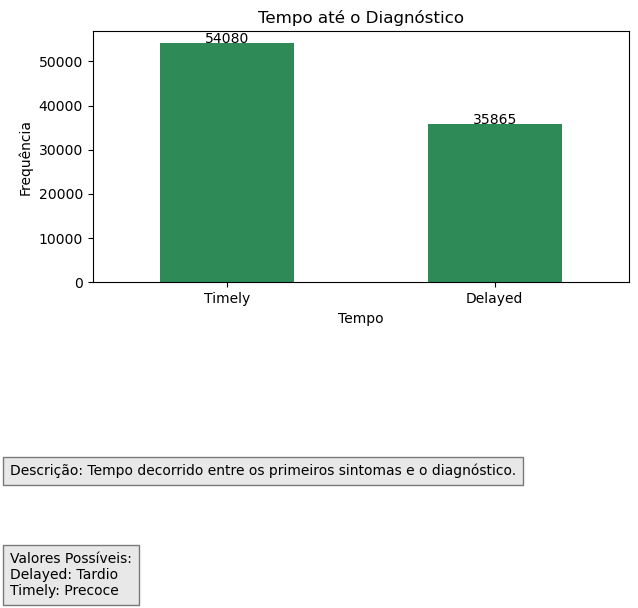




Explicação dos Resultados:

O gráfico de barras exibe a distribuição do tempo até o diagnóstico, mostrando a
frequência de pacientes que receberam o diagnóstico de forma precoce ou tardia.
Observa-se que a maioria dos pacientes recebeu o diagnóstico de forma precoce
(Timely), com uma frequência significativamente maior em comparação com aqueles
que receberam o diagnóstico de forma tardia (Delayed). Essa distribuição pode
refletir a eficácia dos sistemas de saúde na detecção precoce de doenças ou os
critérios de classificação do tempo de diagnóstico. A análise do tempo até o
diagnóstico pode auxiliar na compreensão dos fatores que influenciam o
diagnóstico precoce ou tardio e no planejamento de estratégias de intervenção.


In [34]:
# Gráfico de barras para tempo até o diagnóstico

# Contagem dos valores
counts = df["Time_to_Diagnosis"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Tempo até o Diagnóstico", color='seagreen')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Tempo")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1], labels=["Timely", "Delayed"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: Tempo decorrido entre os primeiros sintomas e o diagnóstico.", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Delayed: Tardio\n"
    "Timely: Precoce"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição

plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto9 = (
    "O gráfico de barras exibe a distribuição do tempo até o diagnóstico, mostrando a frequência de pacientes que receberam o diagnóstico de forma precoce ou tardia. "
    "Observa-se que a maioria dos pacientes recebeu o diagnóstico de forma precoce (Timely), com uma frequência significativamente maior em comparação com aqueles que receberam o diagnóstico de forma tardia (Delayed). "
    "Essa distribuição pode refletir a eficácia dos sistemas de saúde na detecção precoce de doenças ou os critérios de classificação do tempo de diagnóstico. "
    "A análise do tempo até o diagnóstico pode auxiliar na compreensão dos fatores que influenciam o diagnóstico precoce ou tardio e no planejamento de estratégias de intervenção."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto9, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

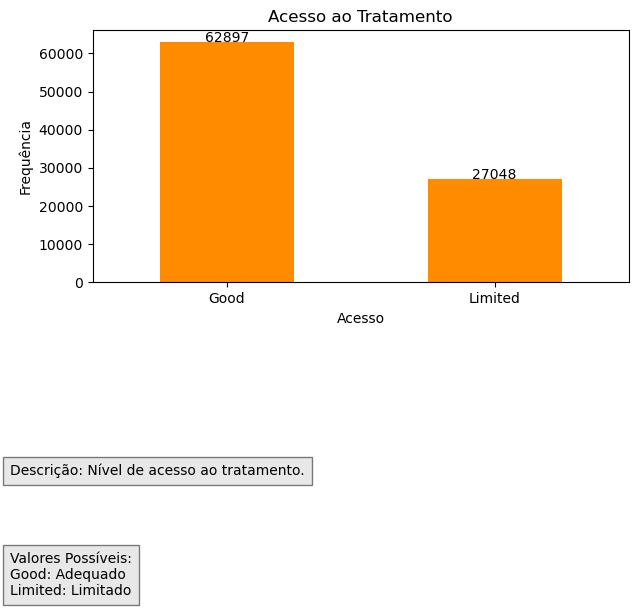




Explicação dos Resultados:

O gráfico de barras exibe a distribuição do nível de acesso ao tratamento entre
os pacientes. Observa-se que a maioria dos pacientes possui acesso adequado ao
tratamento (Good), com uma frequência significativamente maior em comparação com
aqueles que possuem acesso limitado (Limited). Essa distribuição pode refletir a
qualidade dos serviços de saúde disponíveis ou os critérios de classificação do
acesso ao tratamento. A análise do nível de acesso ao tratamento pode auxiliar
na compreensão das disparidades no acesso aos serviços de saúde e no
planejamento de estratégias de intervenção.


In [35]:
# Gráfico de barras para acesso ao tratamento

# Contagem dos valores
counts = df["Treatment_Access"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Acesso ao Tratamento", color='darkorange')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Acesso")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1], labels=["Good", "Limited"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: Nível de acesso ao tratamento.", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Good: Adequado\n"
    "Limited: Limitado"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição

plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto10 = (
    "O gráfico de barras exibe a distribuição do nível de acesso ao tratamento entre os pacientes. "
    "Observa-se que a maioria dos pacientes possui acesso adequado ao tratamento (Good), com uma frequência significativamente maior em comparação com aqueles que possuem acesso limitado (Limited). "
    "Essa distribuição pode refletir a qualidade dos serviços de saúde disponíveis ou os critérios de classificação do acesso ao tratamento. "
    "A análise do nível de acesso ao tratamento pode auxiliar na compreensão das disparidades no acesso aos serviços de saúde e no planejamento de estratégias de intervenção."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto10, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

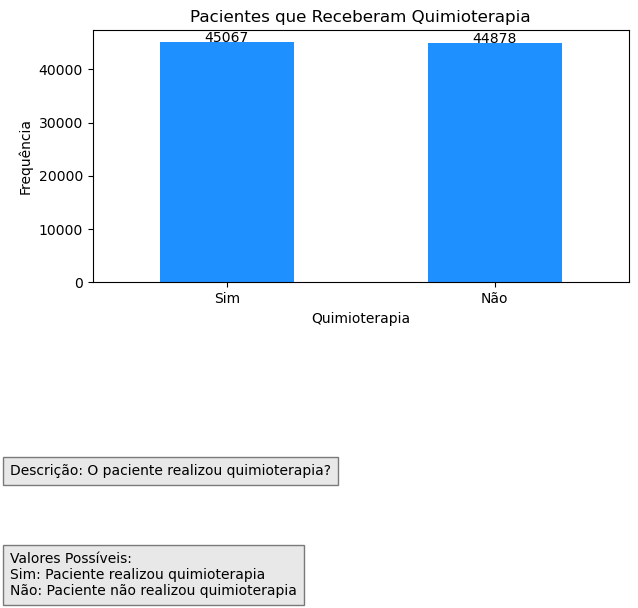




Explicação dos Resultados:

O gráfico de barras exibe a distribuição de pacientes que receberam
quimioterapia. Observa-se que o número de pacientes que receberam quimioterapia
(Sim) é ligeiramente superior ao número de pacientes que não receberam (Não).
Essa distribuição pode refletir as características da população estudada ou os
protocolos de tratamento adotados. A análise da frequência de pacientes que
receberam quimioterapia pode auxiliar na compreensão da utilização desse tipo de
tratamento e no planejamento de estratégias de intervenção.


In [36]:
# Gráfico de barras para quimioterapia recebida

# Contagem dos valores
counts = df["Chemotherapy_Received"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Pacientes que Receberam Quimioterapia", color='dodgerblue')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Quimioterapia")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1], labels=["Sim", "Não"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: O paciente realizou quimioterapia?", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Sim: Paciente realizou quimioterapia\n"
    "Não: Paciente não realizou quimioterapia"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição

plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto11 = (
    "O gráfico de barras exibe a distribuição de pacientes que receberam quimioterapia. "
    "Observa-se que o número de pacientes que receberam quimioterapia (Sim) é ligeiramente superior ao número de pacientes que não receberam (Não). "
    "Essa distribuição pode refletir as características da população estudada ou os protocolos de tratamento adotados. "
    "A análise da frequência de pacientes que receberam quimioterapia pode auxiliar na compreensão da utilização desse tipo de tratamento e no planejamento de estratégias de intervenção."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto11, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

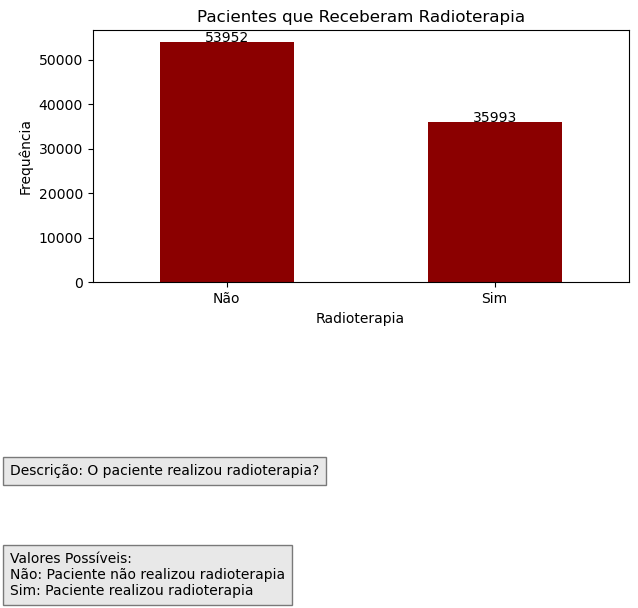




Explicação dos Resultados:

O gráfico de barras exibe a distribuição de pacientes que receberam
radioterapia. Observa-se que a maioria dos pacientes não recebeu radioterapia
(Não), com uma frequência significativamente maior em comparação com aqueles que
receberam (Sim). Essa distribuição pode refletir as características da população
estudada ou os protocolos de tratamento adotados. A análise da frequência de
pacientes que receberam radioterapia pode auxiliar na compreensão da utilização
desse tipo de tratamento e no planejamento de estratégias de intervenção.


In [37]:
# Gráfico de barras para radioterapia recebida

# Contagem dos valores
counts = df["Radiotherapy_Received"].value_counts()
# Criar o gráfico de barras
ax = counts.plot(kind="bar", title="Pacientes que Receberam Radioterapia", color='darkred')
# Adicionar rótulos acima das barras
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)
plt.xlabel("Radioterapia")
plt.ylabel("Frequência")
plt.xticks(ticks=[0, 1], labels=["Não", "Sim"], rotation=0)

# Descrição (em caixa e alinhada à esquerda)
plt.figtext(0.01, -0.25, "Descrição: O paciente realizou radioterapia?", ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Valores possíveis (alinhados e em caixa)
valores_possiveis = (
    "Valores Possíveis:\n"
    "Não: Paciente não realizou radioterapia\n"
    "Sim: Paciente realizou radioterapia"
)

plt.figtext(0.01, -0.5, valores_possiveis, ha="left", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75]) # Ajusta o layout para evitar sobreposição

plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto12 = (
    "O gráfico de barras exibe a distribuição de pacientes que receberam radioterapia. "
    "Observa-se que a maioria dos pacientes não recebeu radioterapia (Não), com uma frequência significativamente maior em comparação com aqueles que receberam (Sim). "
    "Essa distribuição pode refletir as características da população estudada ou os protocolos de tratamento adotados. "
    "A análise da frequência de pacientes que receberam radioterapia pode auxiliar na compreensão da utilização desse tipo de tratamento e no planejamento de estratégias de intervenção."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto12, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

plt.show()

**5) Realizando análises estatísticas entre a categoria "Diagnóstico, Características do Câncer e Tratamento" e demais variáveis numéricas do Dataset (Age e Time To Recurrence):**

In [38]:
# Medidas de Tendência Central e Dispersão
print("\nMedidas de Tendência Central e Dispersãos:")
estatisticas = df.describe().loc[['mean', '50%', 'std']]  # 50% representa a mediana

# Formatação do output para melhor legibilidade
print("\nMédias e Medidas de Dispersão das Variáveis Numéricas:\n")
print(estatisticas.to_string())

# Texto explicativo
texto13 = (
    "A análise das medidas de tendência central e dispersão revela insights importantes sobre as variáveis numéricas do conjunto de dados. "
    "A idade média dos pacientes é de aproximadamente 54 anos, com uma mediana similar, indicando uma distribuição relativamente simétrica. "
    "O estágio médio do diagnóstico é 1.4, sugerindo que a maioria dos pacientes foi diagnosticada em estágios iniciais. "
    "A agressividade tumoral média é 0.8, com uma mediana de 1, indicando uma tendência para tumores de baixa agressividade. "
    "A maioria dos pacientes possui cobertura de seguro de saúde, teve diagnóstico rápido e acesso ao tratamento. "
    "A proporção de pacientes que receberam quimioterapia e radioterapia é aproximadamente igual. "
    "O tempo médio para recorrência é de cerca de 29.5 meses, com uma mediana de 30 meses, sugerindo uma distribuição relativamente simétrica."
    "O desvio padrão para idade e tempo de recorrência indicam uma variação considerável entre os pacientes, enquanto as outras variáveis mostram menor variação."
    "É importante notar que algumas variáveis, como 'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received' e 'Radiotherapy_Received' parecem ser binárias ou ter uma escala limitada, o que explica a baixa variabilidade."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto13, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)


Medidas de Tendência Central e Dispersãos:

Médias e Medidas de Dispersão das Variáveis Numéricas:

            Age  Stage_at_Diagnosis  Tumor_Aggressiveness  Colonoscopy_Access  Insurance_Coverage  Time_to_Diagnosis  Treatment_Access  Chemotherapy_Received  Radiotherapy_Received  Time_to_Recurrence
mean  54.332892            1.399778              0.801090            0.751204            0.801801           0.601256          0.699283               0.501051               0.400167           29.543299
50%   54.000000            1.000000              1.000000            1.000000            1.000000           1.000000          1.000000               1.000000               0.000000           30.000000
std   20.182220            1.069657              0.748656            0.432318            0.398645           0.489643          0.458572               0.500002               0.489935           17.268440

Explicação dos Resultados:

A análise das medidas de tendência central e dispersão revela insi

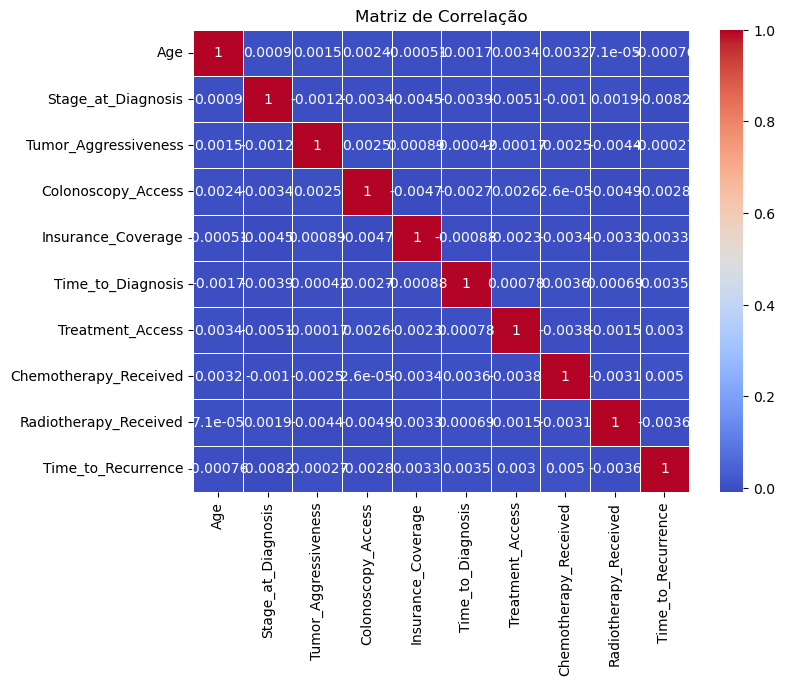


Explicação dos Resultados:

A matriz de correlação exibe as relações lineares entre as variáveis numéricas
do conjunto de dados. Os valores variam de -1 a 1, onde 1 indica uma correlação
positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma
correlação. Neste caso, observa-se que as correlações entre as variáveis são
fracas, com valores próximos de zero. Isso sugere que não há relações lineares
fortes entre as variáveis numéricas analisadas. A ausência de correlações fortes
pode indicar que as variáveis são independentes entre si ou que as relações
entre elas são não lineares.


In [39]:
# Matriz de correlação: Análise de variáveis numéricas de todo dataset. (Faltou BMI)
numerical_df = df.select_dtypes(include=np.number)
if not numerical_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Matriz de Correlação")
    plt.show()

    # Texto explicativo
    texto14 = (
        "A matriz de correlação exibe as relações lineares entre as variáveis numéricas do conjunto de dados. "
        "Os valores variam de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação. "
        "Neste caso, observa-se que as correlações entre as variáveis são fracas, com valores próximos de zero. "
        "Isso sugere que não há relações lineares fortes entre as variáveis numéricas analisadas. "
        "A ausência de correlações fortes pode indicar que as variáveis são independentes entre si ou que as relações entre elas são não lineares."
    )

    # Justificação do texto
    largura = 80  # Ajuste conforme necessário
    texto_justificado = textwrap.fill(texto14, width=largura)

    # Impressão do texto justificado
    print("\nExplicação dos Resultados:\n")
    print(texto_justificado)
else:
    print("\nNenhuma variável numérica disponível para correlação.")

In [40]:
# Resumo estatístico das colunas numéricas (Faltou BMI)
resumo_estatistico = df.describe()

# Formatação do resumo estatístico para melhor legibilidade
resumo_formatado = resumo_estatistico.to_string()

# Impressão do resumo estatístico formatado
print(resumo_formatado)

# Texto explicativo
texto15 = (
    "O resumo estatístico acima apresenta as principais medidas descritivas das variáveis numéricas do conjunto de dados. "
    "A contagem (count) indica o número de observações válidas em cada coluna. "
    "A média (mean) representa o valor médio de cada variável. "
    "O desvio padrão (std) mede a dispersão dos dados em relação à média. "
    "O valor mínimo (min) e o valor máximo (max) indicam os limites da variação de cada variável. "
    "Os quartis (25%, 50%, 75%) dividem os dados em quatro partes iguais, permitindo analisar a distribuição dos dados. "
    "Observa-se que a variável 'Idade' (Age) apresenta uma média de 54.33 anos, com uma variação considerável (desvio padrão de 20.18 anos). "
    "A variável 'Tempo até a Recorrência' (Time_to_Recurrence) apresenta uma média de 29.54 meses, com uma variação de até 59 meses. "
    "As demais variáveis, como 'Estágio do Diagnóstico' (Stage_at_Diagnosis), 'Agressividade do Tumor' (Tumor_Aggressiveness), 'Cobertura do Plano de Saúde' (Insurance_Coverage), "
    "'Tempo até o Diagnóstico' (Time_to_Diagnosis), 'Acesso ao Tratamento' (Treatment_Access), 'Recebimento de Quimioterapia' (Chemotherapy_Received) e 'Recebimento de Radioterapia' (Radiotherapy_Received), "
    "são variáveis categóricas binárias (0 ou 1), com médias próximas de 0.5, indicando uma distribuição equilibrada entre as categorias. "
    "A análise do resumo estatístico pode auxiliar na compreensão da distribuição e variação das variáveis numéricas, "
    "fornecendo informações importantes para a análise exploratória dos dados e o desenvolvimento de modelos preditivos."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto15, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

                Age  Stage_at_Diagnosis  Tumor_Aggressiveness  Colonoscopy_Access  Insurance_Coverage  Time_to_Diagnosis  Treatment_Access  Chemotherapy_Received  Radiotherapy_Received  Time_to_Recurrence
count  89945.000000        89945.000000          89945.000000        89945.000000        89945.000000       89945.000000      89945.000000           89945.000000           89945.000000        89945.000000
mean      54.332892            1.399778              0.801090            0.751204            0.801801           0.601256          0.699283               0.501051               0.400167           29.543299
std       20.182220            1.069657              0.748656            0.432318            0.398645           0.489643          0.458572               0.500002               0.489935           17.268440
min       20.000000            0.000000              0.000000            0.000000            0.000000           0.000000          0.000000               0.000000               0.00

In [41]:
# Medidas de Tendência Central (Média, Mediana, Moda)  (Faltou BMI)

# Média, mediana e moda de variáveis numéricas
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
moda = df.mode().iloc[0]

# Formatação das medidas de tendência central para melhor legibilidade
print("Média:\n", media.to_string())
print("\nMediana:\n", mediana.to_string())
print("\nModa:\n", moda.to_string())

# Texto explicativo
texto16 = (
    "As medidas de tendência central fornecem informações sobre o valor típico de um conjunto de dados. "
    "A média representa o valor médio, a mediana representa o valor central e a moda representa o valor mais frequente. "
    "Neste caso, a média e a mediana das variáveis 'Estágio do Diagnóstico' (Stage_at_Diagnosis), 'Agressividade do Tumor' (Tumor_Aggressiveness), "
    "'Cobertura do Plano de Saúde' (Insurance_Coverage), 'Tempo até o Diagnóstico' (Time_to_Diagnosis), "
    "'Acesso ao Tratamento' (Treatment_Access), 'Recebimento de Quimioterapia' (Chemotherapy_Received) e 'Recebimento de Radioterapia' (Radiotherapy_Received) "
    "são próximas de 1, indicando que a maioria dos pacientes se encontra nas categorias 'Sim' ou 'Adequado' para essas variáveis. "
    "A moda, que representa o valor mais frequente, confirma essa tendência, com a maioria das variáveis categóricas binárias apresentando o valor 1 como moda. "
    "A variável 'Tempo até a Recorrência' (Time_to_Recurrence) apresenta uma moda de 53 meses, indicando que esse é o tempo mais frequente para a recorrência do câncer. "
    "A análise das medidas de tendência central pode auxiliar na compreensão da distribuição dos dados e na identificação de valores típicos para cada variável."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto16, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

Média:
 Age                      54.332892
Stage_at_Diagnosis        1.399778
Tumor_Aggressiveness      0.801090
Colonoscopy_Access        0.751204
Insurance_Coverage        0.801801
Time_to_Diagnosis         0.601256
Treatment_Access          0.699283
Chemotherapy_Received     0.501051
Radiotherapy_Received     0.400167
Time_to_Recurrence       29.543299

Mediana:
 Age                      54.0
Stage_at_Diagnosis        1.0
Tumor_Aggressiveness      1.0
Colonoscopy_Access        1.0
Insurance_Coverage        1.0
Time_to_Diagnosis         1.0
Treatment_Access          1.0
Chemotherapy_Received     1.0
Radiotherapy_Received     0.0
Time_to_Recurrence       30.0

Moda:
 Patient_ID                             1
Age                                 77.0
Gender                              Male
Race                               White
Region                     North America
Urban_or_Rural                     Urban
Socioeconomic_Status              Middle
Family_History                      

In [42]:
# 4) Medidas de Dispersão (Desvio Padrão e Intervalo Interquartil - IQR) (Faltou BMI)

# Desvio padrão
desvio_padrao = df.std(numeric_only=True)

# Intervalo interquartil (IQR)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Formatação das medidas de dispersão para melhor legibilidade
print("Desvio Padrão:\n", desvio_padrao.to_string())
print("\nIntervalo Interquartil (IQR):\n", IQR.to_string())

# Texto explicativo
texto17 = (
    "As medidas de dispersão fornecem informações sobre a variabilidade dos dados em relação à média ou à mediana. "
    "O desvio padrão mede a dispersão dos dados em torno da média, enquanto o intervalo interquartil (IQR) mede a dispersão dos dados em torno da mediana. "
    "Neste caso, observa-se que a variável 'Idade' (Age) apresenta o maior desvio padrão (20.18 anos) e o maior IQR (35 anos), indicando uma alta variabilidade na idade dos pacientes. "
    "A variável 'Tempo até a Recorrência' (Time_to_Recurrence) também apresenta um desvio padrão considerável (17.27 meses) e um IQR de 29 meses, sugerindo uma ampla variação no tempo até a recorrência do câncer. "
    "As demais variáveis, que são categóricas binárias (0 ou 1), apresentam desvios padrão próximos de 0.5 e IQRs de 1 ou 0, indicando uma baixa variabilidade e uma distribuição equilibrada entre as categorias. "
    "A análise das medidas de dispersão pode auxiliar na identificação de variáveis com alta variabilidade, o que pode ter implicações para a análise dos dados e o desenvolvimento de modelos preditivos."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto17, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

Desvio Padrão:
 Age                      20.182220
Stage_at_Diagnosis        1.069657
Tumor_Aggressiveness      0.748656
Colonoscopy_Access        0.432318
Insurance_Coverage        0.398645
Time_to_Diagnosis         0.489643
Treatment_Access          0.458572
Chemotherapy_Received     0.500002
Radiotherapy_Received     0.489935
Time_to_Recurrence       17.268440

Intervalo Interquartil (IQR):
 Age                      35.0
Stage_at_Diagnosis        2.0
Tumor_Aggressiveness      1.0
Colonoscopy_Access        0.0
Insurance_Coverage        0.0
Time_to_Diagnosis         1.0
Treatment_Access          1.0
Chemotherapy_Received     1.0
Radiotherapy_Received     1.0
Time_to_Recurrence       29.0

Explicação dos Resultados:

As medidas de dispersão fornecem informações sobre a variabilidade dos dados em
relação à média ou à mediana. O desvio padrão mede a dispersão dos dados em
torno da média, enquanto o intervalo interquartil (IQR) mede a dispersão dos
dados em torno da mediana. Neste caso, o

In [43]:
# Moda das variáveis da categoria Diagnóstico, Características do Câncer e Tratamento.
mode_values = df[["Stage_at_Diagnosis", "Tumor_Aggressiveness", "Insurance_Coverage",
                  "Time_to_Diagnosis", "Treatment_Access", "Chemotherapy_Received", "Radiotherapy_Received"]].mode().T

# Definindo nomes mais amigáveis para as colunas
mode_values.columns = ["Modo (valor mais frequente)"]

# Exibindo de maneira mais legível
print(mode_values)

# Inserindo um espaço
print("\n")

# Texto a ser exibido
texto1 = (
    "O cálculo do modo das variáveis relacionadas ao diagnóstico, características do câncer e tratamento revelou os seguintes resultados: "
    "a maioria dos pacientes está no estágio 1 do diagnóstico, com tumores de baixa agressividade, possuem cobertura de seguro de saúde e tiveram diagnóstico "
    "em um curto intervalo de tempo. Além disso, a maioria dos pacientes teve acesso ao tratamento e recebeu quimioterapia, enquanto a maioria não recebeu radioterapia. "
    "Esses resultados refletem os padrões mais comuns entre os pacientes e podem auxiliar na definição de estratégias de tratamento e acompanhamento."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto1, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

                       Modo (valor mais frequente)
Stage_at_Diagnosis                               1
Tumor_Aggressiveness                             1
Insurance_Coverage                               1
Time_to_Diagnosis                                1
Treatment_Access                                 1
Chemotherapy_Received                            1
Radiotherapy_Received                            0



Explicação dos Resultados:

O cálculo do modo das variáveis relacionadas ao diagnóstico, características do
câncer e tratamento revelou os seguintes resultados: a maioria dos pacientes
está no estágio 1 do diagnóstico, com tumores de baixa agressividade, possuem
cobertura de seguro de saúde e tiveram diagnóstico em um curto intervalo de
tempo. Além disso, a maioria dos pacientes teve acesso ao tratamento e recebeu
quimioterapia, enquanto a maioria não recebeu radioterapia. Esses resultados
refletem os padrões mais comuns entre os pacientes e podem auxiliar na definição
de estratégia

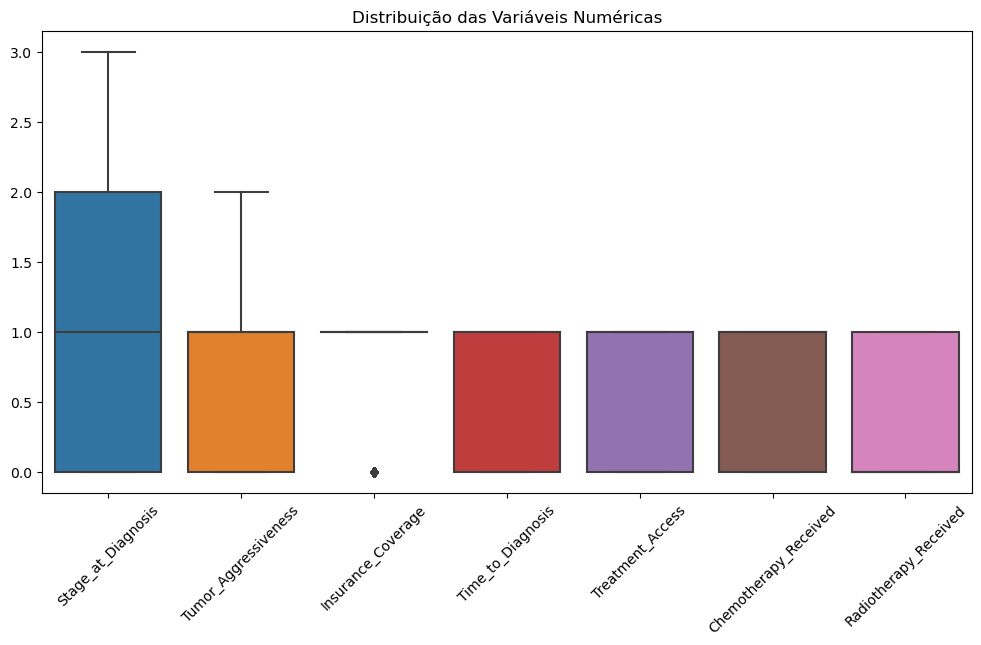




Explicação dos Resultados:

O boxplot gerado revela a distribuição das variáveis numéricas do seu conjunto
de dados, destacando potenciais outliers. A variável 'Stage_at_Diagnosis'
demonstra uma distribuição assimétrica, com uma grande concentração de dados na
faixa inferior e alguns valores atípicos na faixa superior, sugerindo casos com
estágios de diagnóstico mais avançados. 'Tumor_Aggressiveness' exibe uma
distribuição mais uniforme, com alguns outliers na faixa inferior, indicando
tumores menos agressivos em certos casos. 'Insurance_Coverage' apresenta uma
distribuição extremamente concentrada, com um único outlier, possivelmente
representando um caso com cobertura de seguro incomum. As variáveis
'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received' e
'Radiotherapy_Received' mostram distribuições semelhantes, com dados
concentrados em um único valor, sugerindo que a maioria dos pacientes
experimentou tempos de diagnóstico, acesso a tratamento e recebimento de
terapia

In [44]:
# Identificação de Outliers com Boxplot. Outliers são valores que fogem do padrão esperado em um conjunto de dados. O Boxplot mostra a distribuição dos dados com base nos quartis e
# destaca possíveis valores extremos.

plt.figure(figsize=(12, 6))
# Selecionando apenas variáveis numéricas para o boxplot
sns.boxplot(data=df[["Stage_at_Diagnosis", "Tumor_Aggressiveness", "Insurance_Coverage","Time_to_Diagnosis", "Treatment_Access", "Chemotherapy_Received", "Radiotherapy_Received"]])
plt.xticks(rotation=45)
plt.title("Distribuição das Variáveis Numéricas")
plt.show()

# Inserindo um espaço
print("\n")

# Texto a ser exibido
texto2 = (
    "O boxplot gerado revela a distribuição das variáveis numéricas do seu conjunto de dados, destacando potenciais outliers. "
    "A variável 'Stage_at_Diagnosis' demonstra uma distribuição assimétrica, com uma grande concentração de dados na faixa inferior e alguns valores atípicos na faixa superior, "
    "sugerindo casos com estágios de diagnóstico mais avançados. 'Tumor_Aggressiveness' exibe uma distribuição mais uniforme, com alguns outliers na faixa inferior, "
    "indicando tumores menos agressivos em certos casos. 'Insurance_Coverage' apresenta uma distribuição extremamente concentrada, com um único outlier, "
    "possivelmente representando um caso com cobertura de seguro incomum. As variáveis 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received' e 'Radiotherapy_Received' "
    "mostram distribuições semelhantes, com dados concentrados em um único valor, sugerindo que a maioria dos pacientes experimentou tempos de diagnóstico, "
    "acesso a tratamento e recebimento de terapias similares. A ausência de caixas e bigodes nessas variáveis indica uma baixa variabilidade, "
    "o que pode ser resultado de dados binários ou de uma escala limitada."
)


# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto2, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

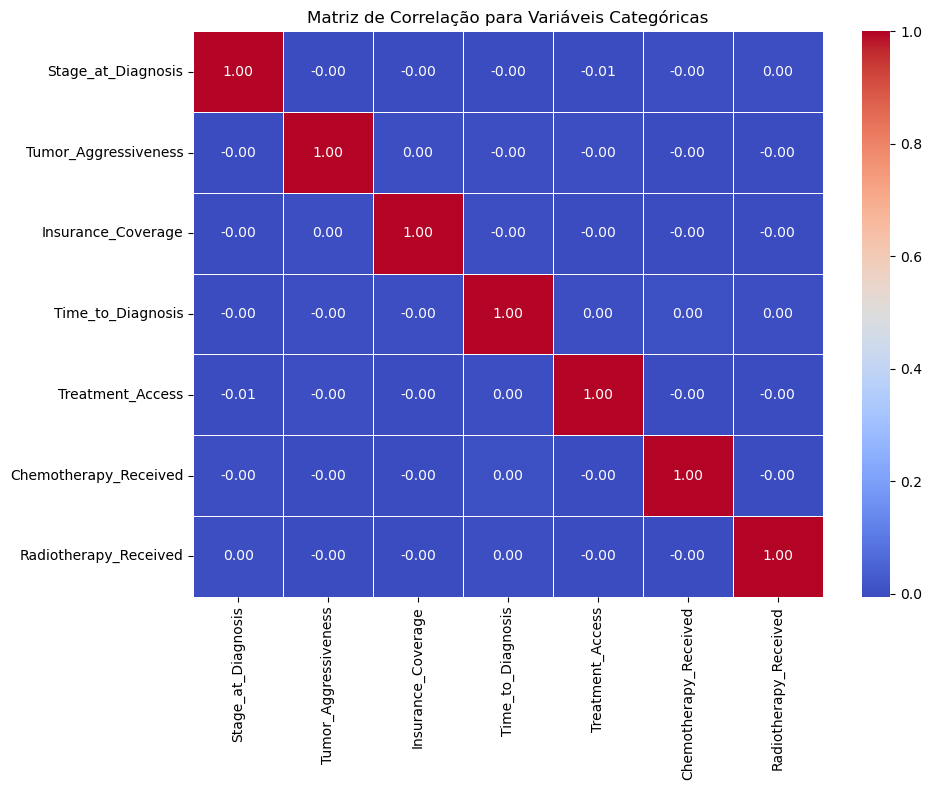




Explicação dos Resultados:

A matriz de correlação gerada a partir das variáveis categóricas do conjunto de
dados revela uma ausência notável de correlações fortes entre as variáveis. Os
valores de correlação estão próximos de zero, indicando que não há relações
lineares significativas entre as variáveis analisadas. Isso sugere que o estágio
do diagnóstico, a agressividade do tumor, a cobertura de seguro, o tempo para o
diagnóstico, o acesso ao tratamento, o recebimento de quimioterapia e
radioterapia são independentes entre si. A independência dessas variáveis pode
ser um indicativo de que cada uma delas contribui de forma única para o
resultado ou característica em estudo, sem influenciar significativamente as
outras. Essa ausência de correlação também pode ser resultado da natureza
categórica das variáveis, que podem não apresentar relações lineares óbvias. Em
cenários como este, outras técnicas de análise, como testes de independência ou
análise de componentes principais, podem 

In [45]:
# Matriz de correlação categórica
plt.figure(figsize=(10, 8))  # Aumentei o tamanho da figura para melhor visualização
categorical_columns = ["Stage_at_Diagnosis", "Tumor_Aggressiveness", "Insurance_Coverage", "Time_to_Diagnosis", "Treatment_Access", "Chemotherapy_Received", "Radiotherapy_Received"]
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5) # Adicionei linewidths para melhor separação das células
plt.title("Matriz de Correlação para Variáveis Categóricas")
plt.tight_layout() # Garante que os rótulos não sejam cortados
plt.show()

# Inserindo um espaço
print("\n")

# Texto explicativo
texto3 = (
    "A matriz de correlação gerada a partir das variáveis categóricas do conjunto de dados revela uma ausência notável de correlações fortes entre as variáveis. "
    "Os valores de correlação estão próximos de zero, indicando que não há relações lineares significativas entre as variáveis analisadas. "
    "Isso sugere que o estágio do diagnóstico, a agressividade do tumor, a cobertura de seguro, o tempo para o diagnóstico, o acesso ao tratamento, o recebimento de quimioterapia e radioterapia são independentes entre si. "
    "A independência dessas variáveis pode ser um indicativo de que cada uma delas contribui de forma única para o resultado ou característica em estudo, sem influenciar significativamente as outras. "
    "Essa ausência de correlação também pode ser resultado da natureza categórica das variáveis, que podem não apresentar relações lineares óbvias. "
    "Em cenários como este, outras técnicas de análise, como testes de independência ou análise de componentes principais, podem ser mais apropriadas para explorar possíveis relações não lineares ou identificar padrões complexos entre as variáveis."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto3, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)

**6) Respondendo as questões de pesquisa relacionada à categoria Diagnóstico, Características do Câncer e Tratamento utilizando métodos de estatística:**

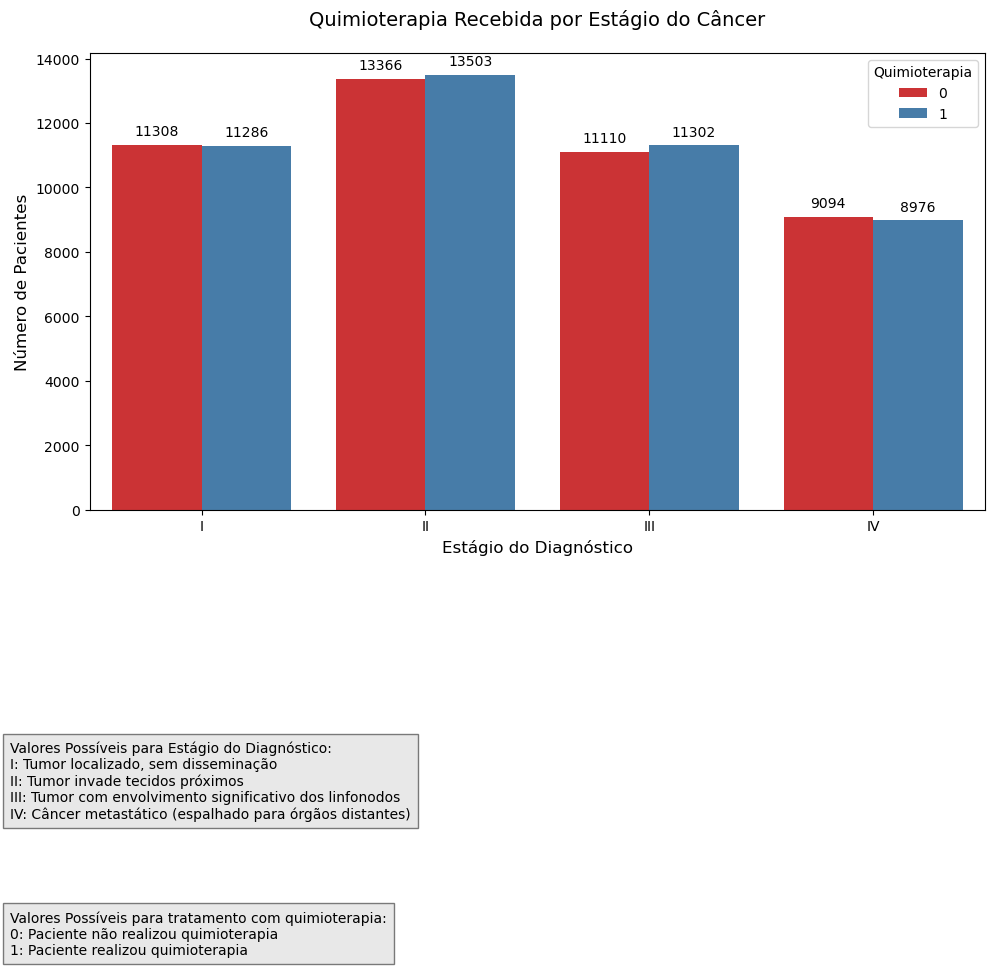


Explicação dos Resultados:

O gráfico de barras acima exibe a relação entre o estágio do câncer no
diagnóstico e o recebimento de quimioterapia pelos pacientes. Observa-se que a
frequência de pacientes que receberam quimioterapia (1) é ligeiramente superior
à frequência de pacientes que não receberam (0) em todos os estágios do câncer.
O teste Qui-quadrado, que avalia a associação entre as duas variáveis, resultou
em um valor de X² de 2.74 e um p-valor de 0.4338. Como o p-valor é superior a
0.05, não há evidência estatística suficiente para rejeitar a hipótese nula de
que não há associação entre o estágio do câncer e o recebimento de
quimioterapia. Isso sugere que a decisão de administrar quimioterapia não é
significativamente influenciada pelo estágio do câncer no diagnóstico, podendo
ser determinada por outros fatores clínicos ou individuais do paciente. A
análise da relação entre o estágio do câncer e o tratamento recebido pode
auxiliar na compreensão dos protocolos de tratamento a

In [46]:
# Pergunta: Considerando os atributos relacionados às informações demográficas e ao diagnóstico e tratamento, qual o tratamento é mais recomendável?
# Não respondeu a questão de pesquisa.

# Criar tabela cruzada entre estágio do câncer e tratamento recebido
crosstab = pd.crosstab(df["Stage_at_Diagnosis"], df["Chemotherapy_Received"])

# Formatação da tabela cruzada para melhor legibilidade e adição de totais
crosstab['Total'] = crosstab.sum(axis=1)  # Adiciona total por estágio
crosstab.loc['Total'] = crosstab.sum(axis=0)  # Adiciona total por quimioterapia

# Teste Qui-quadrado para ver se há associação entre estágio do câncer e quimioterapia
chi2, p, _, _ = chi2_contingency(crosstab.iloc[:-1, :-1])  # Exclui totais do teste

# Gráfico de barras para tratamentos recebidos por estágio do câncer
plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura para melhor espaçamento
ax = sns.countplot(data=df, x="Stage_at_Diagnosis", hue="Chemotherapy_Received", palette="Set1")
plt.title("Quimioterapia Recebida por Estágio do Câncer", fontsize=14, pad=20)  # Aumenta o espaçamento do título
plt.xlabel("Estágio do Diagnóstico", fontsize=12)
plt.ylabel("Número de Pacientes", fontsize=12)
plt.legend(title="Quimioterapia")
plt.xticks(ticks=[0, 1, 2, 3], labels=["I", "II", "III", "IV"], rotation=0)

# Adicionar valores de Stage_at_Diagnosis em cima de cada coluna (como números inteiros)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adicionar caixa de texto com valores possíveis para Stage_at_Diagnosis
valores_possiveis_estagio = (
    "Valores Possíveis para Estágio do Diagnóstico:\n"
    "I: Tumor localizado, sem disseminação\n"
    "II: Tumor invade tecidos próximos\n"
    "III: Tumor com envolvimento significativo dos linfonodos\n"
    "IV: Câncer metastático (espalhado para órgãos distantes)"
)
plt.figtext(0.01, -0.28, valores_possiveis_estagio, ha="left", fontsize=10, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

# Adicionar caixa de texto com valores possíveis para Quimioterapia_Received
valores_possiveis_quimioterapia = (
    "Valores Possíveis para tratamento com quimioterapia:\n"
    "0: Paciente não realizou quimioterapia\n"
    "1: Paciente realizou quimioterapia"
)
plt.figtext(0.01, -0.45, valores_possiveis_quimioterapia, ha="left", fontsize=10, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

plt.tight_layout(rect=[0, 0.03, 1, 0.75])  # Ajusta o layout para evitar sobreposição

plt.show()

# Texto explicativo
texto18 = (
    "O gráfico de barras acima exibe a relação entre o estágio do câncer no diagnóstico e o recebimento de quimioterapia pelos pacientes. "
    "Observa-se que a frequência de pacientes que receberam quimioterapia (1) é ligeiramente superior à frequência de pacientes que não receberam (0) em todos os estágios do câncer. "
    "O teste Qui-quadrado, que avalia a associação entre as duas variáveis, resultou em um valor de X² de 2.74 e um p-valor de 0.4338. "
    "Como o p-valor é superior a 0.05, não há evidência estatística suficiente para rejeitar a hipótese nula de que não há associação entre o estágio do câncer e o recebimento de quimioterapia. "
    "Isso sugere que a decisão de administrar quimioterapia não é significativamente influenciada pelo estágio do câncer no diagnóstico, "
    "podendo ser determinada por outros fatores clínicos ou individuais do paciente. "
    "A análise da relação entre o estágio do câncer e o tratamento recebido pode auxiliar na compreensão dos protocolos de tratamento adotados e no planejamento de estratégias de intervenção."
)

# Justificação do texto
largura = 80  # Ajuste conforme necessário
texto_justificado = textwrap.fill(texto18, width=largura)

# Impressão do texto justificado
print("\nExplicação dos Resultados:\n")
print(texto_justificado)


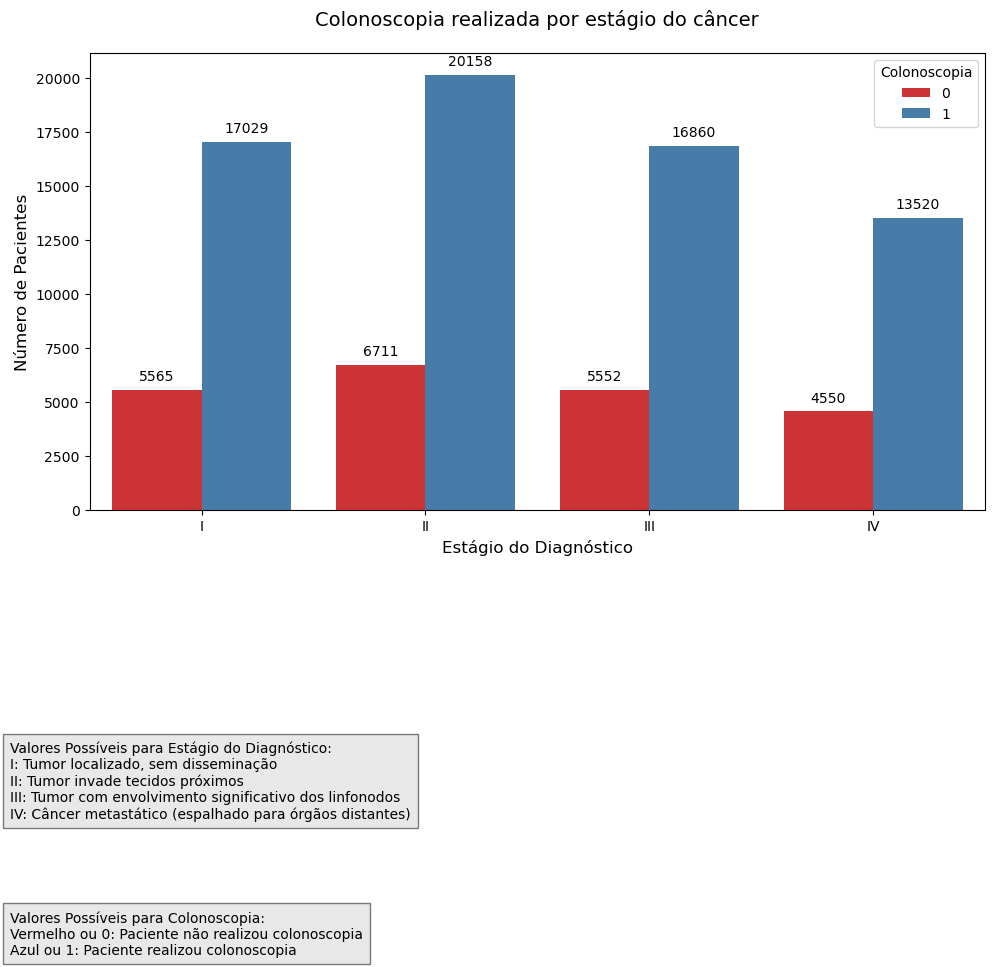


Explicação dos Resultados:

O gráfico de barras acima exibe a relação entre o estágio do câncer no
diagnóstico e a realização de colonoscopia pelos pacientes. Observa-se que a
frequência de pacientes que realizaram colonoscopia (1) é consideravelmente
superior à frequência de pacientes que não realizaram (0) em todos os estágios
do câncer. O teste Qui-quadrado, que avalia a associação entre as duas
variáveis, resultou em um valor de X² de 1.90 e um p-valor de 0.5944. Como o
p-valor é superior a 0.05, não há evidência estatística suficiente para rejeitar
a hipótese nula de que não há associação entre o estágio do câncer e a
realização de colonoscopia. Isso sugere que a decisão de realizar colonoscopia
não é significativamente influenciada pelo estágio do câncer no diagnóstico,
podendo ser determinada por outros fatores clínicos ou individuais do paciente.
A análise da relação entre o estágio do câncer e a realização de colonoscopia
pode auxiliar na compreensão dos protocolos de rastrea

In [47]:
# Pergunta: Considerando os atributos relacionados ao diagnóstico e tratamento, existe uma relação com o fato de o paciente ter se submetido ao exame de colonoscopia?
# Não respondeu a pergunta

# Certifique-se de que há uma coluna indicando se o paciente fez colonoscopia
if "Colonoscopy_Access" in df.columns:
    # Tabela cruzada entre colonoscopia e estágio do câncer
    colonoscopia_crosstab = pd.crosstab(df["Stage_at_Diagnosis"], df["Colonoscopy_Access"])

    # Teste Qui-quadrado
    chi2, p, _, _ = chi2_contingency(colonoscopia_crosstab)

    # Gráfico de barras
    plt.figure(figsize=(10, 8))  # Aumenta o tamanho da figura para melhor espaçamento
    ax = sns.countplot(data=df, x="Stage_at_Diagnosis", hue="Colonoscopy_Access", palette="Set1")
    plt.title("Colonoscopia realizada por estágio do câncer", fontsize=14, pad=20)  # Aumenta o espaçamento do título
    plt.xlabel("Estágio do Diagnóstico", fontsize=12)
    plt.ylabel("Número de Pacientes", fontsize=12)
    plt.legend(title="Colonoscopia")
    plt.xticks(ticks=[0, 1, 2, 3], labels=["I", "II", "III", "IV"], rotation=0)

    # Adicionar valores de Stage_at_Diagnosis em cima de cada coluna (como números inteiros)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Adicionar caixa de texto com valores possíveis para Stage_at_Diagnosis
    valores_possiveis_estagio = (
        "Valores Possíveis para Estágio do Diagnóstico:\n"
        "I: Tumor localizado, sem disseminação\n"
        "II: Tumor invade tecidos próximos\n"
        "III: Tumor com envolvimento significativo dos linfonodos\n"
        "IV: Câncer metastático (espalhado para órgãos distantes)"
    )
    plt.figtext(0.01, -0.28, valores_possiveis_estagio, ha="left", fontsize=10, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

    # Adicionar caixa de texto com valores possíveis para Colonoscopy_Access
    valores_possiveis_colonoscopia = (
        "Valores Possíveis para Colonoscopia:\n"
        "Vermelho ou 0: Paciente não realizou colonoscopia\n"
        "Azul ou 1: Paciente realizou colonoscopia"
    )
    plt.figtext(0.01, -0.45, valores_possiveis_colonoscopia, ha="left", fontsize=10, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

    plt.tight_layout(rect=[0, 0.03, 1, 0.75])  # Ajusta o layout para evitar sobreposição

    plt.show()

    # Texto explicativo
    texto19 = (
        "O gráfico de barras acima exibe a relação entre o estágio do câncer no diagnóstico e a realização de colonoscopia pelos pacientes. "
        "Observa-se que a frequência de pacientes que realizaram colonoscopia (1) é consideravelmente superior à frequência de pacientes que não realizaram (0) em todos os estágios do câncer. "
        "O teste Qui-quadrado, que avalia a associação entre as duas variáveis, resultou em um valor de X² de 1.90 e um p-valor de 0.5944. "
        "Como o p-valor é superior a 0.05, não há evidência estatística suficiente para rejeitar a hipótese nula de que não há associação entre o estágio do câncer e a realização de colonoscopia. "
        "Isso sugere que a decisão de realizar colonoscopia não é significativamente influenciada pelo estágio do câncer no diagnóstico, "
        "podendo ser determinada por outros fatores clínicos ou individuais do paciente. "
        "A análise da relação entre o estágio do câncer e a realização de colonoscopia pode auxiliar na compreensão dos protocolos de rastreamento adotados e no planejamento de estratégias de intervenção."
    )

    # Justificação do texto
    largura = 80  # Ajuste conforme necessário
    texto_justificado = textwrap.fill(texto19, width=largura)

    # Impressão do texto justificado
    print("\nExplicação dos Resultados:\n")
    print(texto_justificado)
else:
    print("⚠️ A coluna 'Colonoscopy_Access' não está no dataset. Verifique os dados disponíveis!")